# Data Distributions
#### The Shape of Data

-----------
_Authors: Carleton Smith, William Peterson_

### Assignment Contents
- [Introducing the Office Supplies Dataset](#data)  
- [Normal Distribution](#normal)  
- [Bernoulli Distributiuon](#bernoulli)  
- [Binomial Distribution](#binomial)  
- [Geometric Distribution](#geometric)  
- [Exponential Distribution](#exponential)  
 

### Overview

This assignment will briefly cover, and work with a number of the distributions introduced in the lectures this week. Emphasis is placed on understanding the differences between the use and parameterization of the various distributions. Particularly at this point in the Data Science course, there are few opportunities to directly use distributions. Thus this assignment stays mostly theoretical.

A fair amount of code in this assignment is beyond what you are expected to know about / understand. Your success on the assignment does not depend on deciphering these code blocks - The important features will be explained in plain English. However, you are encouraged to try to understand the code - for your own edification.

During this assignment, you will be asked to:

- Describe the parameters - and their meaning - for multiple distributions
- Calculate the value of various parmeters, variances, and expected values (means)

<a id = "data"></a>
### Introducing the Office Supplies Dataset

#### Tools
This lesson will use `numpy`, `pandas`, `matplotlib`, and `scipy`. Each of these packages are used extensively among `Python` and `Data Science` practicioners. However, at this point in the course, you are not expected to be expert in any of them. For example, `numpy`, `pandas` and `matplotlib` will be introduced and extinsively used during weeks 7 and 8. `scipy`, on the other hand, will not receive extensive treatment in this course.

In [1]:
# Importing packages that will be used below
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Specify that plots should be shown by defualt in outputs
%matplotlib inline

# Specify location of data
df_path = '../resource/asnlib/publicdata/office_supply.csv'

# Read in data with Pandas
office = pd.read_csv(df_path)

# Column names may be accessed (and changed) using the `.columns` attribute as below
print("Old Column Names:\n", office.columns)  

# Stripping out spaces from ends of names, and replacing internal spaces with "_"
print("\nStripping spaces from ends of column names; replacing internal spaces with '_'\n")
office.columns = [col.strip().replace(' ', '_').lower() for col in office.columns]

# Print edited column names
print("\nNew Column Names:\n", office.columns)

# Subsetting Datad
# Pulling out only transactions and sales amount data
office = office[['campaign_period_sales','number_of_transactions']]

# Print unedited subsetted data for reference:
print("\n\nRaw Data, Note how 'sales' is not numeric")
print(office.head())

# Make Column indicating whether or not sales are negative, denoted by parentheses
office['neg'] = office.campaign_period_sales.str.contains("(", regex= False).values
office['neg'] = office['neg'].map({False:1, True:-1})


# Use regular expressions to pull out sales info
office['campaign_period_sales'] = office['campaign_period_sales'].str.extract(r'([\d,]+.\d+)', expand = False).str.replace(",", "").astype(float)
office['campaign_period_sales'] = office['campaign_period_sales']* office['neg']

# Drop negative sales indicator column
office.drop(['neg'], axis = 'columns', inplace = True)

# Shorten column names
office.rename(columns = {'campaign_period_sales':"sales","number_of_transactions":"transactions"}, inplace = True)

## Print first 5 rows
print("\n\nCleaned data, note numeric values\n")
print(office.head())

Old Column Names:
 Index(['Customer Number', 'Service Level', ' Campaign Period Sales ',
       ' Date of Last Transaction ', 'Date of First Purchase',
       'Number of Transactions', 'Do Not Direct Mail Solicit', 'Do Not Email',
       'Do Not Telemarket', 'Repurchase Method', 'Last Transaction Channel',
       'Email Available', 'Desk', 'Executive Chair', 'Standard Chair',
       'Monitor', 'Printer', 'Computer', 'Insurance', 'Toner',
       'Office Supplies', 'Number of Employees', 'Language'],
      dtype='object')

Stripping spaces from ends of column names; replacing internal spaces with '_'


New Column Names:
 Index(['customer_number', 'service_level', 'campaign_period_sales',
       'date_of_last_transaction', 'date_of_first_purchase',
       'number_of_transactions', 'do_not_direct_mail_solicit', 'do_not_email',
       'do_not_telemarket', 'repurchase_method', 'last_transaction_channel',
       'email_available', 'desk', 'executive_chair', 'standard_chair',
       'monitor',

In [2]:
# Printing out 5-number summary of each variable
office.describe()

,sales,transactions
count,46407.000000,46407.000000
mean,999.040725,13.591075
std,1186.011301,7.451356
min,-919.830000,1.000000
25%,280.590000,7.000000
50%,446.670000,15.000000
75%,1236.900000,19.000000
max,11069.760000,66.000000


Again, if all the code in the above cells did not make complete sense, don't worry. 

At this point, the data is ready to demonstrate a few distributions.

<a id = "normal"></a>
### Normal Distributions

#### Question 1

In [ ]:
### GRADED
### A Normal distribution is parameterized by which of the following
### 'a') mean -- mu
### 'b') Standard Deviation -- sigma
### 'c') probability -- p
### 'd') mean / Variance -- lambda
### 'e') Variance -- sigma-squared

# Covered early in Lecture 5-1
### Assign characters associated with all appropriate choices to a list
### ### e.g. ["x","y","z"]
### Assign list to ans1
### YOUR ANSWER BELOW

ans1 = ["a","b","d","e"]

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


To work with a normal distribution, this section will observe with sample means. The Central Limit Theorem (covered next week) states that - contingent upon a few conditions - the distribution of sample means follows a normal distribution.  

Run the below cell to perform the following 10,000 times:  
1. Randomly choose 100 observations from the 'sales' column
2. Take the mean of that sample of 100 observations.
3. Add that mean to a list called "`sample_means`"  

Finally, the subsequent cell will visualize these collected sample means

In [3]:
%%time
# List to collect sample means
sample_means = []

# Perform process 10000 times
for i in range(10000):
    
    # Draw 100 samples from the "Sales" column
    sample = np.random.choice(office['sales'], size = 100, replace = False )
    
    # Append the mean of those 100 samples to our list
    sample_means.append(np.mean(sample))

    
# Print first five sample means:
print("Example sample means:", sample_means[:5], "\n")

Example sample means: [1117.9273999999998, 1075.8072000000002, 1024.7354, 933.2541, 1015.5820000000001] 

CPU times: user 10.2 s, sys: 568 ms, total: 10.7 s
Wall time: 10.7 s


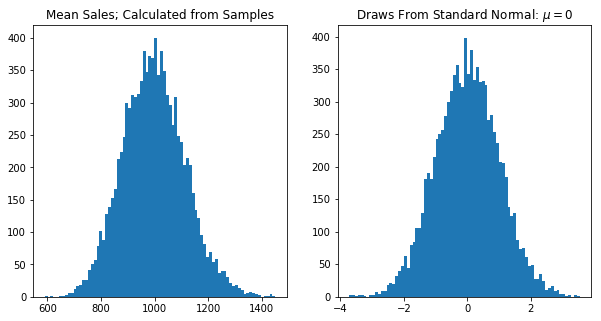

In [4]:
# Run this cell to create a visualization
_, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
ax1.hist(sample_means, bins = 80)
ax1.set_title("Mean Sales; Calculated from Samples");
ax2.hist(np.random.normal(size = 10000), bins = 80)
ax2.set_title("Draws From Standard Normal: $\mu = 0$");

#### Question 2

In [ ]:
### GRADED
### Refer to the above visualizations.
### The figure on the right consists of 10,000 draws from the standard normal distribution.
### The mean (mu) of the distribution on the right is 0.
### Assume the distribution on the left is also normal.
### Estimate the value of mu for the figure on the left.

### Assign estimate as number - float or int - to ans1
### Grading parameters are fairly generous
### YOUR ANSWER BELOW

ans1 = 1000

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Run the below cell to print out the standard deviation of the sample means

In [5]:
print("The standard deviation of the sample means is:", round(np.std(sample_means),4))

The standard deviation of the sample means is: 116.3996


The above Standard deviation should fall somewhere between 110 and 125, depending on the specifics of the samplings.  

Assume that our **office supply company** has **normally distributed** mean sales  with a **mean of \$1,000**, with a **standard deviation of \$120**  

Also assume that a **vending company** features sales that are **normally distributed** mean sales with a **mean of \$950** with a **standard deviation of \$20**.  

Finally assume that the mean sales of the office supply company feature  covariance of 0 ($\rho = 0$)  

We'll let the letter "**O**" represent the office supply company and "**V**" represent the vending company.  



---------------------------  

### Linear Combination of Normal Distributions
Below, two combinations are considered:  

- The simple addition of the mean sales of both companies.
- The combination of .6 of the sales from the office supply company and .4 of the sales from the vending company.

#### Expected Values
The expected value of the office supply sales is the mean; \$1,000, and the expected value of the vending company sales is its mean; \$950.  

Symbolically:  

$E[O] = 1000$  
$E[V] = 950$  

When $a \text{ and } b$ are constants, and $X \text{ and } Y$ are normally distributed, we know: $E[aX +bY] = a*E[X] + b*E[Y]$ Thus:  

$E[O + V] = 1*E[O] + 1*E[V] = 1,000 + 950 = 1,950$  
$E[.6O+.4V] = .6 E[O] + .4 E[V] = .6*1,000 + .4 * 950 = 980$  

#### Variances
The Standard Deviation ($\sigma$) of the office supply sales is 120, and 20 for the vending company. The Variance ($\sigma^2) is the standard deviation squared. Thus the variance for the office supply sales is 14,400, and the variance for the Vending sales is 400.  

Symbolically:  
$Var[O] = 14400$  
$Var[V] = 400$

When $a \text{ and } b$ are constants, and $X \text{ and } Y$ are normally distributed, we know: $Var[aX+bY] = a^2Var[X] + b^2Var[Y] + 2abCov[X,Y]$  

Remember $Cov[X,Y] \text{ is } \rho$. In these problems here, as stated above, $\rho$ is 0.  

Thus to find the variance of the simple addition of the two sales:  

$Var[O+V] = 1^2Var[O] + 1^2Var[V] + 0 = 14,400 + 400 = 14,800$  

When finding the variance of the partial combinations:  

$Var[.6O+.4V] = .6^2Var[O] + .4^2Var[V] + 0 = .36*14,400 + .16*400 = 5,248$  



The next few questions will ask you to calculate the means and variances of linear combination of the above companies' mean sales.

#### Question 3

In [9]:
### GRADED

### Calculate the Expected Value of:
### Twice the mean sales of the office company plus half the mean sales of the vending company

### Symbolically, find E[2*O + .5*V]

### Linear Combination of normal distributions covered in Lecture 5-2 through 5-4

### Assign numeric to ans1
### YOUR ANSWER BELOW
EO = 1000
EV = 950

#answ = (2(1000) + (.5(950)))
ans1 = 2475

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 4

In [ ]:
### GRADED

### Calculate the Variance of:
### Twice the mean sales of the office company plus half the mean sales of the vending company

### Symbolically, find Var[2*O + .5*V]

### Assign int to ans1
### YOUR ANSWER BELOW

VarO = 14400
VarV = 400

# answ = (2^2(14400) + (.5^2(400)))

ans1 = 57700

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 5

In [ ]:
### GRADED

### Calculate the Expected Value of:
### one-tenth the mean sales of the office company plus nine-tenths the mean sales of the vending company

### Symbolically, find E[.1*O + .9*V]



### Assign numeric to ans1
### YOUR ANSWER BELOW
EO = 1000
EV = 950

# .1*1000 + .9*950

ans1 = 955

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 6

In [ ]:
### GRADED

### Calculate the Variance of:
### one-tenth the mean sales of the office company plus nine-tenths the mean sales of the vending company

### Symbolically, find Var[.1*O + .9*V]

### Assign int to ans1
### YOUR ANSWER BELOW

VarO = 14400
VarV = 400

# .1^2 * 14400 + .9^2 * 400

ans1 = 468

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id = "bernoulli"></a>
### Bernoulli Distributiuon

Bernoulli Distributions show the probabilities of **two** outcomes in a **single "trial"**, aka the probability of a stock price movement direction:

    1. Stock goes up     -> 0.6
    2. Stock goes down   -> 0.4
    
Another example, (possible) probabilities of:

    1. sales >=0    -> 0.9
    2. sales <0    -> 0.1

Notice these are mututally exclusive outcomes, with all probabilities adding up to 1.0.

Let's find the actual probability of sales - in the office data set - being greater than or equal to zero:

In [10]:
# Take just the sales
sales = office['sales']

print("Total Sales observations:", len(sales)) # How many sales
print("Total non-negative sales observations", len(sales[sales>=0])) # How many Sales over 0
print(
    "Ratio of non-negative sales observations",
    len(sales[sales>=0])/len(sales)) # Calculate proportion

Total Sales observations: 46407
Total non-negative sales observations 46368
Ratio of non-negative sales observations 0.9991596095416639


Thankfully for this company, there are very few instances of negative sales figures for an account.  
Let's calculate another probability:
Assume that this supplier needs \$250 in sales in order for an account to break even

In [11]:
print("Total Sales observations:", len(sales))
print("Total break-even accounts", len(sales[sales>=250]))
print("Ratio of break-even accounts", len(sales[sales>=250])/len(sales))

Total Sales observations: 46407
Total break-even accounts 37356
Ratio of break-even accounts 0.8049647682461698


Let's round the above to a probability of .8 that a random account breaks-even or better.

Value of pmf for 0 (failure):  0.19999999999999998 
Value of pmf for 1 (success): 0.8


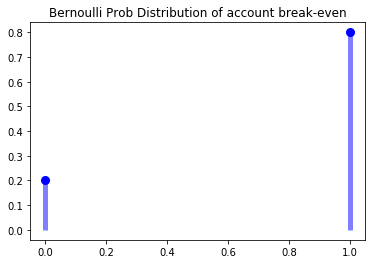

In [12]:
p = 0.8  # Rough probability of an account breaking even

print("Value of pmf for 0 (failure): ", stats.bernoulli.pmf(0,p),
     "\nValue of pmf for 1 (success):", stats.bernoulli.pmf(1,p)) # Print out values

plt.plot(0, stats.bernoulli.pmf(0, p), 'bo', ms=8) # Plot a point
plt.vlines(0, 0, stats.bernoulli.pmf(0, p), colors='b', lw=5, alpha=0.5) # Plot line going up to that point

plt.plot(1, stats.bernoulli.pmf(1, p), 'bo', ms=8) # Plot a point
plt.vlines(1, 0, stats.bernoulli.pmf(1, p), colors='b', lw=5, alpha=0.5) # Plot line going up to that point
plt.title("Bernoulli Prob Distribution of account break-even");

As should be clear from the above, visualizing a Bernoulli Distribution's PMF is not particularly exciting.  

The long decimal is due to the way numbers are stored in Python.

#### Question 7:


In [ ]:
### GRADED
### True or False:

### The Bernoulli Distribution requires only 1 parameter: `p`.
### This 'p' representing the probability of a success occurring in a single trial.
### From knowing `p`, the expected value, variance, PMF, and CDF can all be calculated.

### Covered early in Lecture 5-9
### Assign boolean answer to ans1
### YOUR ANSWER BELOW

ans1 = True

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 8:

In [ ]:
### GRADED
### Choose all that apply:
### Which of the following would be appropriate to model with a single Bernoulli distribution?

### 'a') The probability of a basketball player making or missing a free throw.
### 'b') The probability that website user will click on an advertisement
### 'c') The probability that you are taller than the next two people you meet.
### 'd') The stock price of Netflix tomorrow. 

### Assign characters associated with all appropriate choices to a list
### ### e.g. ["x","y","z"]

### Covered Early in Lecture 5-9
### Assign list to ans1
### YOUR ANSWER BELOW

ans1 = ["a","b"]

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id = "binomial"></a>
### Binomial Distribution  

The binomial distribution is the distribution found from repeating a Bernoulli trial with a $p$ chance of success  $n$ times.  

#### Question 9:


In [ ]:
### GRADED
### Given our p-value from above - of .8, and an n- parameter of 100

### What will be the expected mean of the binomial distribution? -- Assign to ans_mean

### Covered mid-way through Lecture 5-9
### YOUR ANSWERS BELOW

# My Notes
#The mean of the distribution (μx) is equal to n * P .
#The variance (σ2x) is n * P * ( 1 - P ).
#The standard deviation (σx) is sqrt[ n * P * ( 1 - P ) ].

#binomial_mean = P * n = .8 *100

ans_mean = 80

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


We will simulate a binomial distribution.

Running the below cell will do the following ten-thousand times:
1. Draw 100 samples from the sales column
2. Count how many of them are greater than 250
3. Add that count to bin_sample

In [13]:
%%time
# Create list for storing observations
bin_sample = []

# Run code 10000 times
for i in range(10000):
    # Take 100 samples from "sales"
    sample = np.random.choice(office['sales'], size = 100, replace = True)
    
    # Only keep observations greater than 250
    break_even = [s for s in sample if s >=250]
    
    # Count remaining observations
    bin_sample.append(len(break_even))

CPU times: user 636 ms, sys: 0 ns, total: 636 ms
Wall time: 635 ms


The below cell will create two over-lapping bar-graphs. One, in blue, will be our observed binomial distribution, taken from the office data. In red will be the actual pmf of a binomial distribution parameterized by p = ~.801 and n = 100 (multiplied by 10,000).

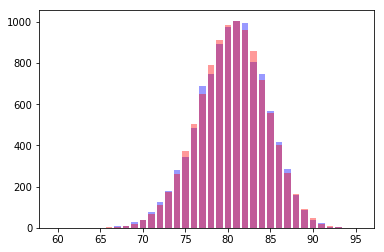

In [14]:
# Counting up the instances of each number of successes for the bar plot.
bin_sample_counts = pd.Series(bin_sample).value_counts()
plt.bar(bin_sample_counts.index, bin_sample_counts, color = "blue", alpha = .4)

# Creating the binomial data, such that it looks the same as our "observed" data
binom_pmf = {}
for i in range(60,96):
    binom_pmf[i] = stats.binom.pmf(i,100,len(sales[sales>=250])/len(sales),  )*10000
    
binom_pmf_ser=pd.Series(binom_pmf)

plt.bar(binom_pmf_ser.index, binom_pmf_ser, color = "red", alpha = .4);

In [ ]:
# If desired, use this cell to look at bin_sample_counts, and/or binom_pmf_ser

#### Question 10:

In [ ]:
### GRADED
### True or False:
### It would be appropriate to say that the *expected value*
### of the above binomial distribution is about 0.8

### Covered later in Lecture 5-9
### Assign boolean answer to ans1
### YOUR ANSWER BELOW

# It's the mean 

ans1 = False

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 11:

In [ ]:
### GRADED
### Given a binomial distribution with n = 100 and p = .80
### What is the variance of the distribution?

### Equation for calculating variance of Binomial covered in lecture 5-9

### Assign number to ans1
### YOUR ANSWER BELOW

#The variance (σ2x) is n * P * ( 1 - P ).

n = 100
p = .8

ans1 = 16

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id = "geometric"></a>
### Geometric Distributions
This distribution describes the number of trials needed for the **FIRST** success.

- Discrete distribution
- Only 1 parameter: $p$
- Expected value: $1/p$
- Variance: $(1-p)/p^2$


Let's extend the example found near the end of lecture 5-10, with a basketball player whose chances of making a free-throw are 60% ($p = .6$)  

#### Probability of making first shot  

With making the first shot, there is only one Bernoulli trial. What is the probability that was a success?  

The probability of one success is .6, thus that is the probability of making the first shot.  

#### Probability of making the first shot on the second attempt

Making the second shot, there are two Bernoulli trials, a failure then a success.  

The probability of the first failure is $1-p$ or .4.  Probability of the success on the second shot is $p$ or .6.  

Thus the probability of making the first shot on the second attempt is $(1-p)p = .4*.6 = .24$  

#### Probability of making the first shot on the 5th attempt.  

Making the fifth shot, there are five Bernoulli trials, four failures then a success.  

The probability of all the failures is $1-p$ or .4.  Probability of the success on the second shot is $p$ or .6.  

Thus the probability of making the first shot on the fifth attempt is $(1-p)^4p = .4^4*.6 = .1536$  
#### Question 12:

In [ ]:
### GRADED
### Given our probability of success of .8, what is the likelihood of a success on
### EITHER the first or second trial?

### Assign float, between 0 and 1 to ans1

### YOUR ANSWER BELOW
p = .8

# probability of success on the first shot, or the second shot (IE - make one, miss the other)


# Make 2nd attempt: (1-p)*p = (1-.8)*.8 = .16


#make 1st: P = .8
#Make 2nd attempt: (1-p)*p = (1-.8)*.8 = .16

# add the probabilities together to get the probability of making either one of the shots: 
# make(attempt1) + make(attempt2) = .8 + .16 = .96 

ans1 = .96

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 13:

In [ ]:
### GRADED
### Given our probability of .8, what is the expected value of a geometric distribution?
### Assign number, float or int, to ans1

### Covered early in Lecture 5-10
### YOUR ANSWER BELOW

# Expected Value for a Geometric Dist is 1/p
# 1/p = 1/.8

ans1 = 1.25

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Once again, we will simulate our distribution with 10,000 trials.
1. Randomly order the sales column
2. Starting from item 1, see how long it takes to find sales greater than 250.
3. Add that (one-based) index to a list

In [15]:
%%time
# List to save data
geom_trials = []
for i in range(10000):
    
    # Permute the sales data
    perm = np.random.permutation(sales)
    attempt = 1 # One based indexing
    
    # Find first sales greater than 250
    while perm[attempt-1] <=250:
        attempt +=1
    
    # append index
    geom_trials.append(attempt)

CPU times: user 9.92 s, sys: 180 ms, total: 10.1 s
Wall time: 10.1 s


1    8093
2    1521
3     312
4      59
5       8
6       6
7       1
dtype: int64


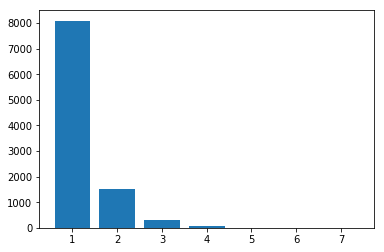

In [16]:
trial_num = pd.Series(geom_trials).value_counts()
print(trial_num)
plt.bar(trial_num.index, trial_num);

As makes intuitive sense, around 80% of the time, the first observation included sales above the break-even threshold.  

However, a few times it took 5 or more attempts to see a success.  

#### Question 14:

In [19]:
### GRADED
### Given the parameter p = .8.
### Calculate: what is the probability of seeing the first success at trial 5 or later?

### e.g. What is the probability the first succes is NOT in trials one through four?

### FOR REFERENCE:
### The probability the first success does not occur in the first trial is:
### 1 - p = 1- .8 = .2
### The probability the first success does not occur in the first OR second trial is:
### 1-(p+p(1-p)) = 1-(.8+.8*.2) = 1-.96 = .04

### Assign float, between 0 and 1 to ans1

### YOUR ANSWER BELOW

# prob of 4 failures = 1-(.8+.8+.8+.8*.2) = 1-.64 = .36
# trial 5 success = .8

# .36 * .8

ans1 = 0.64


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<a id = "exponential"></a>
### Exponential Distribution

The final distribution covered in this assignment is the Exponential Distribution.  
The Exponential Distribution models continous random variables, for example, arrival times and rates. E.g. time until a person arrives at a restaurant; time until a component breaks down.

- One parameter: lambda -- $\lambda$
- Expected value: $1/\lambda$
- Standard deviation: $1/\lambda$
- Variance: $1/\lambda^2$


Of note, the Geometric Distribution is the discrete version of Exponential -- if the Bernoulli trials in the Geometric Dist were occuring in continuous time, it would be the Exponential Distribution.


Let's assume that our office supply company receives an order, **on average** every 4 hours. Also assume the time between orders is distributed exponentially.

This means our expected value is 4. We also know that the expected value is equal to $1/\lambda$. Thus: 

$$4 = 1/\lambda \rightarrow \lambda = 1/4$$

#### Question 15:

In [ ]:
### GRADED
### If the lambda parameter of an exponential distribution is equal to 1/4
### What is the standard deviation of that exponential distribution?

### Covered in Lecture 5-11

### Assign number to ans1

### YOUR ANSWER BELOW

# 1/.25

ans1 = 4

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


#### Question 16:

In [ ]:
### GRADED
### True or False:
### The Exponential distribution exhibits the "Memoryless" quality

### Covered in Lecture 5-11


### Assign Boolean to ans1
### YOUR ANSWER BELOW

# The memoryless property (also called the forgetfulness property) means that a given probability distribution is independent 
#of its history. ... If a probability distribution has the memoryless property the likelihood of something happening in the 
#future has no relation to whether or not it has happened in the past.

ans1 = True

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###
